In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Dropout, GlobalMaxPool1D, Embedding, Dense, InputLayer, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from matplotlib import pyplot as plt

In [2]:
data = tf.keras.utils.audio_dataset_from_directory('./data', seed=7, batch_size=1000)

Found 999 files belonging to 10 classes.


In [3]:
data.class_names

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [4]:
X = []
y = []

for (x, l) in data.as_numpy_iterator():
    X = x
    y = l

In [5]:
X[0]

array([[-0.0005188 ],
       [ 0.00067139],
       [-0.00146484],
       ...,
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]], dtype=float32)

In [6]:
X[0].shape

(675808, 1)

In [7]:
y[0]

0

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [9]:
X_train.shape

(799, 675808, 1)

In [10]:
#spliting data

In [11]:
newX_train=[]
newX_test=[]
newy_train=[]
newy_test=[]

n = len(X)
ostatak = n%5

n_train = X_train.shape[0]
n_test = y_test.shape[0]
for i in range(n_train):
    X_pom = X_train[i][:-(ostatak-1)]
    pom = np.split(X_pom,5)
    for j in range(5):
        newX_train.append(pom[j])
        newy_train.append(y_train[i])

for i in range(n_test):
    X_pom = X_test[i][:-(ostatak-1)]
    pom = np.split(X_pom,5)
    for j in range(5):
        newX_test.append(pom[j])
        newy_test.append(y_test[i])

In [12]:
newX_train = np.array(newX_train)
newX_test = np.array(newX_test)

In [13]:
newX_train.shape

(3995, 135161, 1)

In [14]:
newX_test.shape

(1000, 135161, 1)

In [15]:
X_test.shape

(200, 675808, 1)

In [16]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
len(newy_test)

1000

In [18]:
len(newy_train)

3995

In [19]:
newy_train = to_categorical(newy_train)
newy_test = to_categorical(newy_test)

In [20]:
newy_test.shape

(1000, 10)

In [21]:
new_input_dim = newX_train[0].shape

In [22]:
model= Sequential([
    InputLayer(input_shape=new_input_dim),
    Conv1D(32, 5, activation='relu'),
    MaxPool1D(5),
    Dropout(0.3),
    Conv1D(32, 5, activation='relu'),
    MaxPool1D(5),
    Dropout(0.25),
    Conv1D(32, 5, activation='relu'),
    MaxPool1D(5),
    Dropout(0.2),
    Conv1D(32, 5, activation='relu'),
    MaxPool1D(5),
    Dropout(0.1),
    Conv1D(32, 5, activation='relu'),
    MaxPool1D(5),
    Dropout(0.1),
    Conv1D(32, 5, activation='relu'),
    MaxPool1D(5),
    Dropout(0.1),
    Flatten(),
    Dense(10, activation='softmax')
])
model.summary()
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(0.001), metrics=['accuracy'])
history = model.fit(newX_train, newy_train, batch_size=32, epochs=10, validation_split=0.2) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 135157, 32)        192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 27031, 32)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 27031, 32)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, 27027, 32)         5152      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 5405, 32)          0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5405, 32)          0

In [23]:
model.evaluate(newX_test,newy_test)

32/32 [==============================] - 18s 555ms/step - loss: 1.3226 - accuracy: 0.5630


[1.322644829750061, 0.5630000233650208]

In [24]:
#new_model7= Sequential([
#    InputLayer(input_shape=new_input_dim),
#    Conv1D(32, 5, activation='relu'),
#    MaxPool1D(5),
#    Dropout(0.3),
#    Conv1D(32, 5, activation='relu'),
#    MaxPool1D(5),
#    Dropout(0.25),
#    Conv1D(32, 5, activation='relu'),
#    MaxPool1D(5),
#    Dropout(0.2),
#    Conv1D(32, 5, activation='relu'),
#    MaxPool1D(5),
#    Dropout(0.1),
#    Conv1D(32, 5, activation='relu'),
#    MaxPool1D(5),
#    Dropout(0.1),
#    Conv1D(32, 5, activation='relu'),
#    MaxPool1D(5),
#    Dropout(0.1),
#    Flatten(),
#    Dense(10, activation='softmax')
#])
#new_model7.summary()
#new_model7.compile(loss=CategoricalCrossentropy(), optimizer=Adam(0.001), metrics=['accuracy'])
#new_history7 = new_model7.fit(newX_train, newy_train, batch_size=32, epochs=10, validation_split=0.2) 

#new_model7.evaluate(newX_test,newy_test)

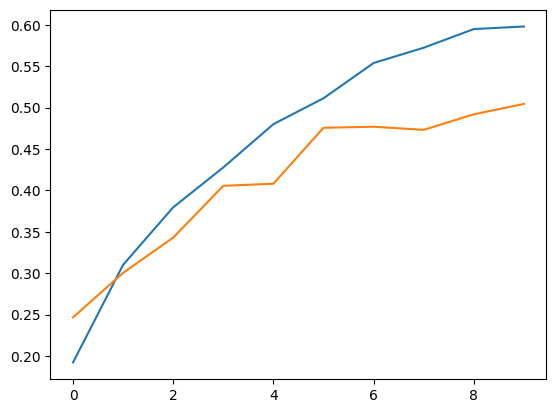

In [26]:
plt.plot(history.epoch,history.history['accuracy'])
plt.plot(history.epoch,history.history['val_accuracy'])
plt.show()